# Importing the dataset

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

# 1.) Explain the dataset 

In [14]:
data=pd.read_csv("Advertising (1).csv")
data

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


The column 'Unnamed' is just a serial number for the rows. So we can drop that column before further processing.

In [16]:
data=data.drop("Unnamed: 0",axis=1)

In [17]:
# Checking for null values in the dataset
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

There is no null value present in the dataset

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


# 2.) Check the summary statistics and discuss max, min, avg, median and percentiles

In [19]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


The above table shows mean, minimum, maximum, median, and the standard deviation,percentiles of data attributes.These values are lowest for radio and highest for television.Therefore, we can conclude that television is the most expensive mode of advertising and radio is the least expensive.

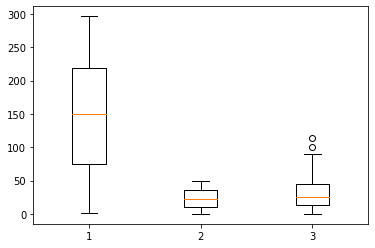

In [20]:
plt.boxplot(data[['TV','Radio','Newspaper']])
plt.show()

<AxesSubplot:>

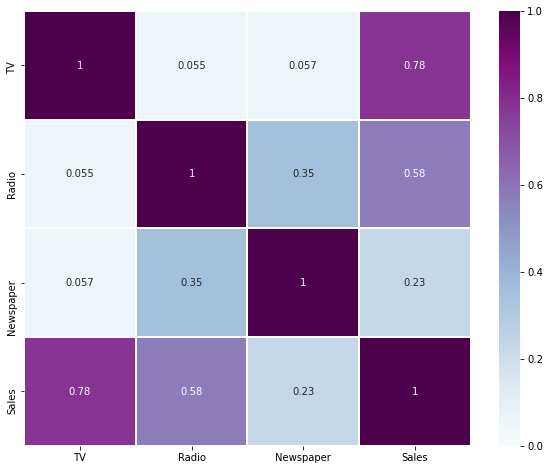

In [25]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), vmin=0, vmax=1, linewidth=1, annot=True,cmap="BuPu")

TV has highest correlation with the sales and newspaper has the least correlation with the sales.

#  3.) The manager wants to find out whether the same amount was spent for the three advertisements (TV , Radio and Newspaper). Comment on your findings

Here we are doing one way ANOVA test 



H0: All the ads have same mean expenditure

H1: Mean all are not the same

In [26]:
f,p=stats.f_oneway(data['TV'],data['Radio'],data['Newspaper'])
print('F-statistics : ',f)
print('p-value : ',p)

F-statistics :  358.8514595342597
p-value :  4.552931539744962e-103


Since the p-value is less than 0.05  we reject the null hypothesis.

This ANOVA test shows that there is a difference in Sales among the three advertisement techniques.